# Região Centro Oeste PA Janeiro de 2023

### Reading the files

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df_go = pd.read_csv('csv/PAGO2301.csv')
df_go.head()

C:\Users\digui\AppData\Local\Temp\ipykernel_10040\4116246047.py:5: DtypeWarning: Columns (20,22,29,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_go = pd.read_csv('csv/PAGO2301.csv')


,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
0,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202030300,6,0,2,S,5222202648630,0,221105,21,0,0,1,0,0,0000,0000,0000,2,43,0.0,130.0,1,F,1,520510,1,1,10.00,10.00,0,0,0.0,0.0,10.00,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
1,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202030300,6,0,2,S,5222202648620,0,221105,21,0,0,1,0,0,0000,0000,0000,2,23,0.0,130.0,1,F,1,521740,1,1,10.00,10.00,0,1,0.0,0.0,10.00,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
2,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202020380,6,0,2,S,5222204430685,0,221105,21,0,0,1,0,0,0000,0000,0000,2,65,0.0,130.0,1,M,1,520510,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
3,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202020380,6,0,2,S,5222204430696,0,221105,21,0,0,1,0,0,0000,0000,0000,2,73,0.0,130.0,1,M,3,520510,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
4,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202020380,6,0,2,S,5222204430630,0,221105,21,0,0,1,0,0,0000,0000,0000,2,52,0.0,130.0,1,F,1,520510,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062


In [2]:
df_df = pd.read_csv('csv/PADF2301.csv')
df_go.head()

C:\Users\digui\AppData\Local\Temp\ipykernel_10040\3439462602.py:1: DtypeWarning: Columns (20,22,30,31) have mixed types. Specify dtype option on import or set low_memory=False.
  df_df = pd.read_csv('csv/PADF2301.csv')


,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
0,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202030300,6,0,2,S,5222202648630,0,221105,21,0,0,1,0,0,0000,0000,0000,2,43,0.0,130.0,1,F,1,520510,1,1,10.00,10.00,0,0,0.0,0.0,10.00,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
1,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202030300,6,0,2,S,5222202648620,0,221105,21,0,0,1,0,0,0000,0000,0000,2,23,0.0,130.0,1,F,1,521740,1,1,10.00,10.00,0,1,0.0,0.0,10.00,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
2,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202020380,6,0,2,S,5222204430685,0,221105,21,0,0,1,0,0,0000,0000,0000,2,65,0.0,130.0,1,M,1,520510,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
3,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202020380,6,0,2,S,5222204430696,0,221105,21,0,0,1,0,0,0000,0000,0000,2,73,0.0,130.0,1,M,3,520510,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
4,2442620,520510,PG,520510,0,0,0,5,0,I,1326206000179,0,0,202301,202301,202020380,6,0,2,S,5222204430630,0,221105,21,0,0,1,0,0,0000,0000,0000,2,52,0.0,130.0,1,F,1,520510,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062


In [3]:
df_ms = pd.read_csv('csv/PAMS2301.csv', encoding='ISO-8859-1')
df_ms.head()

C:\Users\digui\AppData\Local\Temp\ipykernel_10040\33397276.py:1: DtypeWarning: Columns (22,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_ms = pd.read_csv('csv/PAMS2301.csv', encoding='ISO-8859-1')


,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
0,9989,500270,PG,500270,0,0,0,36,0,I,26813683000190,0,0,202301,202301,202010210,6,0,2,S,5022201739555,0,223415,21,0,0,1,0,0,0000,0000,0000,1,68,0.0,130.0,1,M,3,500270,1,1,1.85,1.85,0,0,0.0,0.0,1.85,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
1,9989,500270,PG,500270,0,0,0,36,0,I,26813683000190,0,0,202301,202301,202010210,6,0,2,S,5022201739566,0,223415,21,0,0,1,0,0,0000,0000,0000,1,22,0.0,130.0,1,M,3,500270,1,1,1.85,1.85,0,0,0.0,0.0,1.85,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
2,9989,500270,PG,500270,0,0,0,36,0,I,26813683000190,0,0,202301,202301,202010210,6,0,2,S,5022201739533,0,223415,21,0,0,1,0,0,0000,0000,0000,1,43,0.0,130.0,1,M,1,500600,1,1,1.85,1.85,0,1,0.0,0.0,1.85,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
3,9989,500270,PG,500270,0,0,0,36,0,I,26813683000190,0,0,202301,202301,202010023,6,0,2,S,5023201511185,0,223415,21,0,0,1,0,0,0000,0000,0000,1,59,0.0,130.0,1,F,2,500270,1,1,2.01,2.01,0,0,0.0,0.0,2.01,5,1,R,0,NaN,0.0,0.0,0.0,NaN,NaN,2062
4,9989,500270,PG,500270,0,0,0,36,0,I,26813683000190,0,0,202301,202301,202010023,6,0,2,S,5023201511196,0,223415,21,0,0,1,0,0,0000,0000,0000,1,58,0.0,130.0,1,M,3,500270,1,1,2.01,2.01,0,0,0.0,0.0,2.01,5,1,R,0,NaN,0.0,0.0,0.0,NaN,NaN,2062


In [4]:
df_mt = pd.read_csv('csv/PAMT2301.csv', encoding='ISO-8859-1')
df_mt.head()

C:\Users\digui\AppData\Local\Temp\ipykernel_10040\3317342588.py:1: DtypeWarning: Columns (22,30,31,53) have mixed types. Specify dtype option on import or set low_memory=False.
  df_mt = pd.read_csv('csv/PAMT2301.csv', encoding='ISO-8859-1')


,PA_CODUNI,PA_GESTAO,PA_CONDIC,PA_UFMUN,PA_REGCT,PA_INCOUT,PA_INCURG,PA_TPUPS,PA_TIPPRE,PA_MN_IND,PA_CNPJCPF,PA_CNPJMNT,PA_CNPJ_CC,PA_MVM,PA_CMP,PA_PROC_ID,PA_TPFIN,PA_SUBFIN,PA_NIVCPL,PA_DOCORIG,PA_AUTORIZ,PA_CNSMED,PA_CBOCOD,PA_MOTSAI,PA_OBITO,PA_ENCERR,PA_PERMAN,PA_ALTA,PA_TRANSF,PA_CIDPRI,PA_CIDSEC,PA_CIDCAS,PA_CATEND,PA_IDADE,IDADEMIN,IDADEMAX,PA_FLIDADE,PA_SEXO,PA_RACACOR,PA_MUNPCN,PA_QTDPRO,PA_QTDAPR,PA_VALPRO,PA_VALAPR,PA_UFDIF,PA_MNDIF,PA_DIF_VAL,NU_VPA_TOT,NU_PA_TOT,PA_INDICA,PA_CODOCO,PA_FLQT,PA_FLER,PA_ETNIA,PA_VL_CF,PA_VL_CL,PA_VL_INC,PA_SRV_C,PA_INE,PA_NAT_JUR
0,2396580,510760,PG,510760,0,0,0,36,0,M,3347101000121,3347101000121,0,202301,202301,202020380,6,0,2,S,5122202119738,0,223415,21,0,0,1,0,0,0000,0000,0000,1,40,0.0,130.0,1,F,4,510760,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244
1,2396580,510760,PG,510760,0,0,0,36,0,M,3347101000121,3347101000121,0,202301,202301,202020380,6,0,2,S,5122202119750,0,223415,21,0,0,1,0,0,0000,0000,0000,1,84,0.0,130.0,1,F,1,510760,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244
2,2396580,510760,PG,510760,0,0,0,36,0,M,3347101000121,3347101000121,0,202301,202301,202020380,6,0,2,S,5122202119661,0,223415,21,0,0,1,0,0,0000,0000,0000,1,72,0.0,130.0,1,M,4,510760,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244
3,2396580,510760,PG,510760,0,0,0,36,0,M,3347101000121,3347101000121,0,202301,202301,202020380,6,0,2,S,5122202119640,0,223415,21,0,0,1,0,0,0000,0000,0000,1,53,0.0,130.0,1,M,2,510760,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244
4,2396580,510760,PG,510760,0,0,0,36,0,M,3347101000121,3347101000121,0,202301,202301,202020380,6,0,2,S,5123200353733,0,223415,21,0,0,1,0,0,0000,0000,0000,1,83,0.0,130.0,1,M,4,510760,1,1,4.11,4.11,0,0,0.0,0.0,4.11,5,1,K,0,NaN,0.0,0.0,0.0,NaN,NaN,1244


### Merging the data of PA_CIDPRI in one dataset with the 4 states

In [5]:
# Calculate the frequency of each unique value in the PA_CIDPRI column for each dataframe
freq_go = df_go['PA_CIDPRI'].value_counts().reset_index()
freq_go.columns = ['PA_CIDPRI', 'Frequency_GO']

freq_ms = df_ms['PA_CIDPRI'].value_counts().reset_index()
freq_ms.columns = ['PA_CIDPRI', 'Frequency_MS']

freq_mt = df_mt['PA_CIDPRI'].value_counts().reset_index()
freq_mt.columns = ['PA_CIDPRI', 'Frequency_MT']

freq_df = df_df['PA_CIDPRI'].value_counts().reset_index()
freq_df.columns = ['PA_CIDPRI', 'Frequency_DF']

# Step 2: Merge the frequency dataframes on PA_CIDPRI
df_região_centro_oeste = freq_go.merge(freq_ms, on='PA_CIDPRI', how='outer') \
                .merge(freq_mt, on='PA_CIDPRI', how='outer') \
                .merge(freq_df, on='PA_CIDPRI', how='outer')

# Rename columns
df_região_centro_oeste.columns = ['PA_CIDPRI', 'Goiás', 'Mato Grosso do Sul', 'Mato Grosso', 'Distrito Federal']

# Fill NaN with 0s for accurate frequency calculations
df_região_centro_oeste.fillna(0, inplace=True)

# Calculate the Total Frequency
df_região_centro_oeste['Total Frequency'] = df_região_centro_oeste[['Goiás', 'Mato Grosso do Sul', 'Mato Grosso', 'Distrito Federal']].sum(axis=1)

df_região_centro_oeste = df_região_centro_oeste.sort_values(by='Total Frequency', ascending=False)

df_região_centro_oeste.head()

,PA_CIDPRI,Goiás,Mato Grosso do Sul,Mato Grosso,Distrito Federal,Total Frequency
0,0000,662371.0,427091.0,769298.0,280727.0,2139487.0
1,Z000,30781.0,8391.0,26618.0,1501.0,67291.0
52,Z008,1527.0,30491.0,1342.0,164.0,33524.0
3,N180,6754.0,4060.0,10353.0,3245.0,24412.0
2,0,16384.0,0.0,0.0,0.0,16384.0


### Frequency of the first 5 rows excluding the 0000

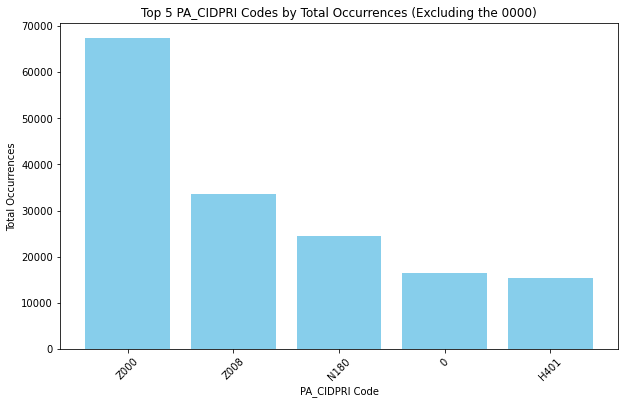

In [6]:
# Ensure PA_CIDPRI is of type string
df_região_centro_oeste['PA_CIDPRI'] = df_região_centro_oeste['PA_CIDPRI'].astype(str)

# Exclude the first row and then retrieve the top 5 rows
top5_excluding_first = df_região_centro_oeste.iloc[1:6]

# Now plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(top5_excluding_first['PA_CIDPRI'], top5_excluding_first['Total Frequency'], color='skyblue')
plt.title('Top 5 PA_CIDPRI Codes by Total Occurrences (Excluding the 0000)')
plt.xlabel('PA_CIDPRI Code')
plt.ylabel('Total Occurrences')
plt.xticks(rotation=45)
plt.show()

### Pie Chart of the N180

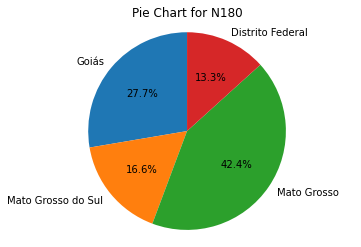

In [7]:
from matplotlib import pyplot as plt

# Filter out the 'N180' row
df_n180_row = df_região_centro_oeste[df_região_centro_oeste['PA_CIDPRI'] == 'N180']

# Drop 'PA_CIDPRI' and 'Total Frequency' columns
df_n180_data = df_n180_row.drop(columns=['PA_CIDPRI', 'Total Frequency'])

# Now we can plot the pie chart
fig, ax = plt.subplots()
ax.pie(df_n180_data.iloc[0], labels=df_n180_data.columns, autopct='%1.1f%%', startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle.

# Set the title of the pie chart
plt.title('Pie Chart for N180')

# Display the pie chart
plt.show()

In [8]:
# Filter each DataFrame for 'N180' in 'PA_CIDPRI'
filtered_df = df_df[df_df['PA_CIDPRI'] == 'N180']
filtered_go = df_go[df_go['PA_CIDPRI'] == 'N180']
filtered_ms = df_ms[df_ms['PA_CIDPRI'] == 'N180']
filtered_mt = df_mt[df_mt['PA_CIDPRI'] == 'N180']

# Calculate the frequency of 'PA_IDADE' for each filtered DataFrame
freq_df = filtered_df['PA_IDADE'].value_counts().rename('DF')
freq_go = filtered_go['PA_IDADE'].value_counts().rename('GO')
freq_ms = filtered_ms['PA_IDADE'].value_counts().rename('MS')
freq_mt = filtered_mt['PA_IDADE'].value_counts().rename('MT')

# Merge the frequencies into a single DataFrame
freq_merged = pd.concat([freq_df, freq_go, freq_ms, freq_mt], axis=1, sort=False)

# Fill NaN values with 0 to indicate no occurrences for that age in a specific dataset
freq_merged = freq_merged.fillna(0).astype(int)

# Resetting the index to make the current index a column
freq_merged = freq_merged.reset_index()

# Renaming the new column to 'Age'
freq_merged.rename(columns={'index': 'Age'}, inplace=True)

freq_merged.head()

,Age,DF,GO,MS,MT
0,56,101,151,117,240
1,62,95,188,86,249
2,65,91,148,100,337
3,48,91,139,100,167
4,54,87,126,99,283


### Calculating weighted average age for each state

In [9]:
weights = freq_merged['Age']
df_average = (freq_merged['DF'] * weights).sum() / freq_merged['DF'].sum()
go_average = (freq_merged['GO'] * weights).sum() / freq_merged['GO'].sum()
ms_average = (freq_merged['MS'] * weights).sum() / freq_merged['MS'].sum()
mt_average = (freq_merged['MT'] * weights).sum() / freq_merged['MT'].sum()

# Consolidating the averages into a dictionary for easier plotting
state_averages = {
    'DF': df_average,
    'GO': go_average,
    'MS': ms_average,
    'MT': mt_average
}

### Plotting the bar chart of weighted average ages

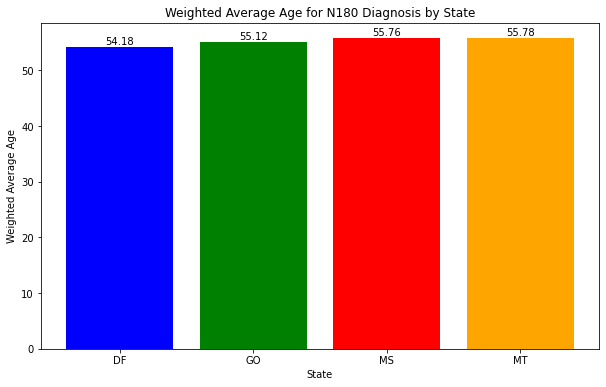

In [10]:
states = list(state_averages.keys())
averages = list(state_averages.values())

plt.figure(figsize=(10, 6))
plt.bar(states, averages, color=['blue', 'green', 'red', 'orange'])

plt.title('Weighted Average Age for N180 Diagnosis by State')
plt.xlabel('State')
plt.ylabel('Weighted Average Age')
plt.xticks(states)

for i, avg in enumerate(averages):
    plt.text(i, avg + 0.5, f"{avg:.2f}", ha = 'center')

plt.show()

### Exporting to a csv file

In [11]:
# Specify the file name
file_name = 'csv/regiao_centro_oeste_pa.csv'

# Export the DataFrame to a CSV file
df_região_centro_oeste.to_csv(file_name, index=False)  # Set index=False to avoid writing row indices

print(f"DataFrame exported to {file_name}")

DataFrame exported to csv/regiao_centro_oeste_pa.csv
